In [1]:
#Data Augmentation --> jiske through apan log rotated images ko bhi sahi se predict kr skte h
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import PIL

In [2]:
url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
dir=tf.keras.utils.get_file('flower_photos',origin=url,cache_dir='.',untar=True)  #The untar method is to convert the zip file into normal file

In [4]:
dir

'.\\datasets\\flower_photos'

In [5]:
import pathlib

In [6]:
dir=pathlib.Path(dir)
dir

WindowsPath('datasets/flower_photos')

In [7]:
list(dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [8]:
count=len(list(dir.glob('*/*.jpg')))
count

3670

In [9]:
roses=list(dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [10]:
len(roses)

641

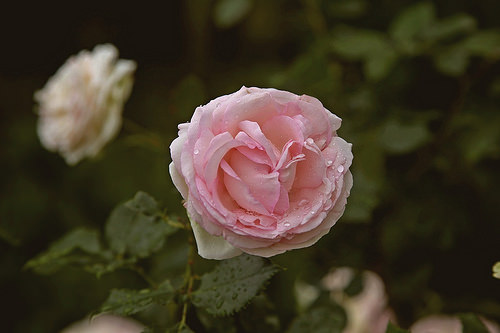

In [11]:
PIL.Image.open(str(roses[100]))  #code to access the PIL image of the dataset stored

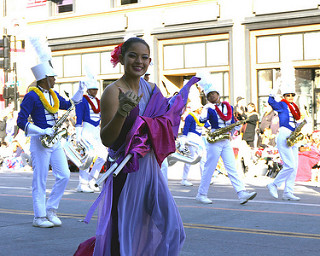

In [12]:
PIL.Image.open(str(roses[102]))

In [13]:
dict={
    'roses':list(dir.glob('roses/*')),
    'daisy':list(dir.glob('daisy/*')),
    'dandelion':list(dir.glob('dandelion/*')),
    'sunflowers':list(dir.glob('sunflowers/*')),
    'tulips':list(dir.glob('tulips/*'))
}

In [14]:
label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [15]:
dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [16]:
str(dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [17]:
img=cv2.imread(str(dict['roses'][0])) #converts the image into a numpy array

In [18]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [19]:
img.shape

(240, 179, 3)

In [20]:
cv2.resize(img,(180,180)).shape  #changes the shape of the above image to 180*180

(180, 180, 3)

In [21]:
X,y=[],[]
for i, j in dict.items():
    print(i," : ",len(j))

roses  :  641
daisy  :  633
dandelion  :  898
sunflowers  :  699
tulips  :  799


In [22]:
for flower_name,images in dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(label_dict[flower_name])

In [23]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [24]:
X=np.array(X)
y=np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [26]:
len(X_train)  #By default the splitting is 75% to 25 %

2752

In [27]:
len(X_test)

918

In [28]:
918/(2752+918)

0.2501362397820163

In [29]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [30]:
X_train_scaled

array([[[[0.03529412, 0.05490196, 0.05098039],
         [0.03921569, 0.05490196, 0.05882353],
         [0.04705882, 0.06666667, 0.0627451 ],
         ...,
         [0.08235294, 0.12941176, 0.08627451],
         [0.0745098 , 0.15686275, 0.10980392],
         [0.09411765, 0.2       , 0.16078431]],

        [[0.01960784, 0.03921569, 0.03529412],
         [0.02352941, 0.03921569, 0.03921569],
         [0.02352941, 0.04313725, 0.03921569],
         ...,
         [0.08627451, 0.14509804, 0.10588235],
         [0.09411765, 0.18039216, 0.14509804],
         [0.09803922, 0.2       , 0.16862745]],

        [[0.        , 0.01568627, 0.01176471],
         [0.01176471, 0.03137255, 0.02745098],
         [0.02352941, 0.04705882, 0.03921569],
         ...,
         [0.09803922, 0.16862745, 0.14117647],
         [0.10588235, 0.19607843, 0.17254902],
         [0.09019608, 0.18823529, 0.17254902]],

        ...,

        [[0.05882353, 0.07058824, 0.05882353],
         [0.0745098 , 0.09019608, 0.07843137]

In [31]:
classes=5
model=keras.Sequential([
    keras.layers.Conv2D(16,3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(classes)   #uses linear activation here if not specified
])

In [32]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [33]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 389ms/step - accuracy: 0.2096 - loss: 11.8681
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 365ms/step - accuracy: 0.2036 - loss: 12.8357
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 356ms/step - accuracy: 0.2242 - loss: 12.5045
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 355ms/step - accuracy: 0.2246 - loss: 12.4974
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 365ms/step - accuracy: 0.2307 - loss: 12.3989
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 460ms/step - accuracy: 0.2095 - loss: 12.7418
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 461ms/step - accuracy: 0.2209 - loss: 12.5581
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 468ms/step - accuracy: 0.2303 - loss: 12.4059
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 456ms/step - accuracy: 0.2200 - loss: 12.5720
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 35s 400ms/step - accuracy: 0.2120 - loss: 12.7017


In [34]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.2261 - loss: 12.4739


[12.624086380004883, 0.21677559614181519]

In [35]:
pred=model.predict(X_test_scaled)
pred[0]

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


array([-65.50095 , -92.57572 , -96.18302 , -11.117457,  19.837234],
      dtype=float32)

In [36]:
np.argmax(pred[10])

4

In [37]:
y_test[10]

2

In [38]:
np.argmax(pred[432])

4

In [39]:
y_test[432]

0

In [40]:
score=tf.nn.softmax(pred[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.6715325e-38, 0.0000000e+00, 0.0000000e+00, 3.6020337e-14,
       1.0000000e+00], dtype=float32)>

In [41]:
np.argmax(score)

4

In [42]:
from keras.layers import RandomZoom
# data_augmentation=keras.Sequential([
#     layers.preprocessing.RandomZoom(0.3),
#])

In [43]:
data_augmentation=keras.Sequential([
    layers.RandomZoom(0.3),
])

NameError: name 'layers' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(X_train_scaled[0])


In [ ]:
plt.imshow(X[0])

In [ ]:
plt.imshow(X_train[0])

In [ ]:
data_augmentation(X)[0]

In [ ]:
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))